# UBER data analysis

1.Check for Missing Values

2.Dropping NaN values

3.The machine fails to recognize the date time format so we need to change the dtype

4.Now we are going to extract the day of the month and other things

5.Lets check the various Pickup points we have

6.what hour do people take rides to their destination

7.Which day has highest number of trips

8.what hour do people take rides to their destination

9.Number of trips in the month

10.what are the number of trips each day

11.Time taken the journey

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [106]:
ud= pd.read_csv('UberData.csv')

In [107]:
ud

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [108]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [109]:
ud.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [110]:
ud.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [117]:
#Check for Missing Values

ud.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [120]:
ud.isnull().any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

In [129]:
# Dropping NaN values

ud=ud.dropna()

In [130]:
ud.isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [131]:
ud.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [132]:
ud.Status.unique()

array(['Trip Completed'], dtype=object)

In [133]:
# The machine fails to recognize the date time format so we need to change the dtype

ud['Request timestamp']= pd.to_datetime(ud['Request timestamp'])
ud['Drop timestamp']= pd.to_datetime(ud['Drop timestamp'])


C:\Users\HP\AppData\Local\Temp/ipykernel_14224/2709479583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud['Request timestamp']= pd.to_datetime(ud['Request timestamp'])
C:\Users\HP\AppData\Local\Temp/ipykernel_14224/2709479583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud['Drop timestamp']= pd.to_datetime(ud['Drop timestamp'])


In [134]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2830
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         2831 non-null   int64         
 1   Pickup point       2831 non-null   object        
 2   Driver id          2831 non-null   float64       
 3   Status             2831 non-null   object        
 4   Request timestamp  2831 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 154.8+ KB


In [135]:
# Now we are going to extract the day of the month and other things

hour=[]
day=[]
dayofweek= []
month=[]
weekday=[]


for X in ud['Request timestamp']:
    hour.append(X.hour)
    day.append(X.day)
    dayofweek.append(X.dayofweek)
    month.append(X.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    

In [136]:
ud['Hour']=hour
ud['Day']=day
ud['Day of Week']= dayofweek
ud['Month']= month
ud['Week Day']= weekday


C:\Users\HP\AppData\Local\Temp/ipykernel_14224/2990239859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud['Hour']=hour
C:\Users\HP\AppData\Local\Temp/ipykernel_14224/2990239859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud['Day']=day
C:\Users\HP\AppData\Local\Temp/ipykernel_14224/2990239859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [137]:
ud.head(100)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Day,Day of Week,Month,Week Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,0,11,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,0,11,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,2,12,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,2,12,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,2,7,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
95,3353,City,11.0,Trip Completed,2016-07-13 13:29:44,2016-07-13 14:09:00,13,13,2,7,Wednesday
96,4293,City,11.0,Trip Completed,2016-07-14 06:42:36,2016-07-14 07:12:41,6,14,3,7,Thursday
97,4936,City,11.0,Trip Completed,2016-07-14 18:22:17,2016-07-14 19:14:36,18,14,3,7,Thursday
98,5661,Airport,11.0,Trip Completed,2016-07-15 07:08:50,2016-07-15 07:59:00,7,15,4,7,Friday


In [138]:
# Lets check the various Pickup points we have 

ud['Pickup point'].value_counts()


City       1504
Airport    1327
Name: Pickup point, dtype: int64

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

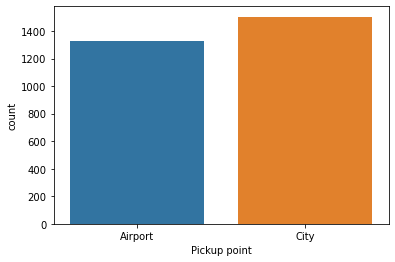

In [139]:
sns.countplot(x='Pickup point',data= ud)

Text(0.5, 1.0, 'Number of trips vs Hour')

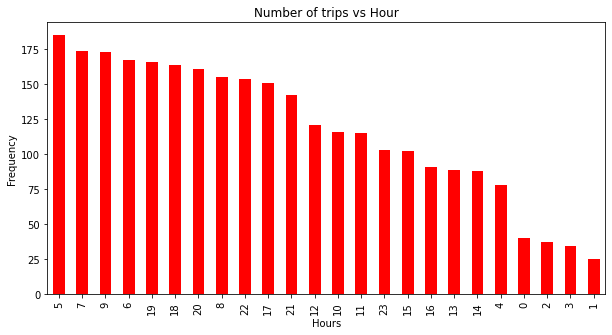

In [140]:
# what hour do people take rides to their destination

hours = ud['Request timestamp'].dt.hour.value_counts()
hours.plot(kind = 'bar',color = 'red',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs Hour')

<AxesSubplot:>

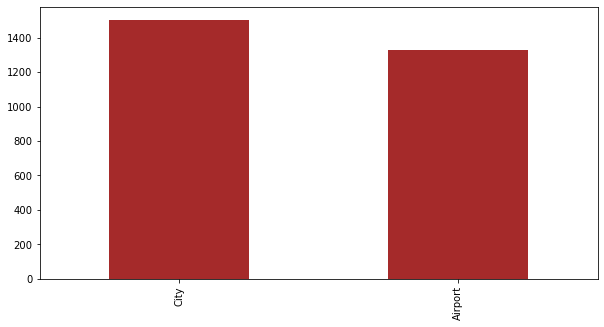

In [141]:
ud['Pickup point'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')


<AxesSubplot:>

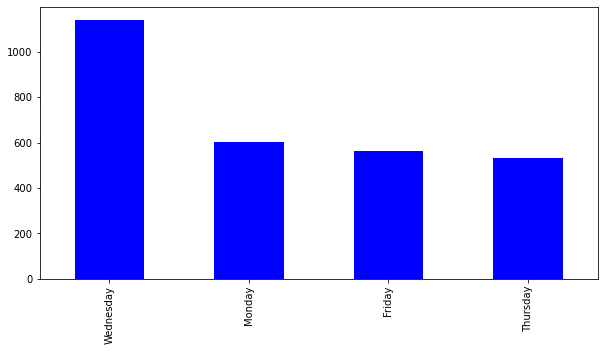

In [142]:
#Which day has highest number of trips

ud['Week Day'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

<AxesSubplot:>

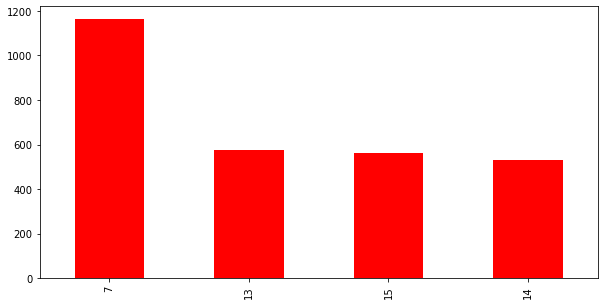

In [143]:
# what are the number of trips each day
ud['Day'].value_counts().plot(kind='bar',figsize=(10,5),color='red')


<AxesSubplot:>

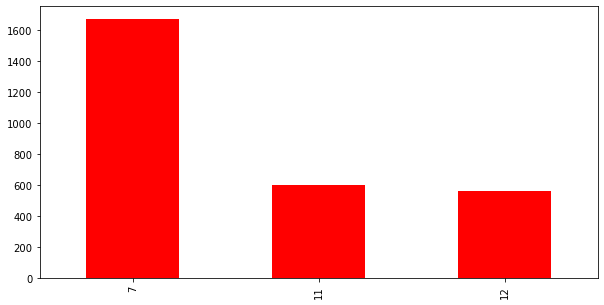

In [144]:
#Number of trips in the month

ud['Month'].value_counts().plot(kind='bar',figsize=(10,5),color='red')

In [145]:
# Number of Trips completed

ud['Status'].value_counts()

Trip Completed    2831
Name: Status, dtype: int64

In [146]:
# Time taken the journey
difference = (ud['Drop timestamp'] - ud['Request timestamp'])

In [147]:
difference.head()

0   0 days 01:09:00
1   0 days 00:50:00
2   0 days 00:41:00
3   0 days 00:55:00
4   0 days 00:52:31
dtype: timedelta64[ns]